# CSCE 633 :: Machine Learning :: Texas A&M University :: Spring 2022

# Programming Assignment 1 (P1)
**Name: Ada Huang**  
**UIN: 426006283**  

# Perceptron
- **100 points**
- **Due Wednesday, Sep 22, 11:59 pm**

In this assignment, you'll be coding up the perceptron algorithm from scratch. Refer to the class slides for the weight update rule.  

### Instructions
- You are **NOT** allowed to use machine learning libraries such as scikit-learn to build a perceptron for this assignment.
- You are required to complete the functions defined in the code blocks following each question. Fill out sections of the code marked `"YOUR CODE HERE"`.
- You're free to add any number of methods within each class.
- You may also add any number of additional code blocks that you deem necessary. 
- Once you've filled out your solutions, submit the notebook on Canvas following the instructions [here](https://people.engr.tamu.edu/guni/csce421/assignments.html).
- Do **NOT** forget to type in your name and UIN at the beginning of the notebook.

## Question 1 (100 points)

## Coding up a perceptron

In [2]:
# Importing Libraries
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Complete the `Perceptron` class.**

In [1]:
class Perceptron:
    def __init__(self, data, epochs=3):
        """
        Args:
            epochs: number of training epochs
        """
        self.epochs = epochs
        self.misclassifications = 0
        ## Add any other variables you need here
        ## YOUR CODE HERE
        self.data = data
        self.w_vector = np.array([0, 0]) # initialize the weight vector
        self.lr = 0.2
        

    def update_weights(self, features, true_label, i):
        """
        The weight update rule. Iterates over each weight and updates it.
        Increments self.misclassifications by 1 if there is a misclassification.

        Args:
            features: Dependent variables (x)
            true_label: Target variable (y)
        """
        
        ## YOUR CODE HERE
        weight = [0] * len(features)
        if self.predict(features) != true_label[i]:
            for j in range(len(self.w_vector)):
                weight[j] = self.w_vector[j] + true_label[i] * features[j]
            self.misclassifications = self.misclassifications + 1
            self.w_vector = weight


    
    def train(self, features, true_labels, plotting=True):
        """
        features: dependent variables (x)
        true_labels: target variables (y)
        plotting: plot the decision boundary (True by default)
        """
        # Initialize the weights
        ## YOUR CODE HERE
        # already initialized in def __int__
       

        # For each epoch
        for epoch in range(self.epochs):
            # Iterate over the training data
            for i in range(len(features)):
                
                if plotting:
                    print("Iteration {}, Misclassifications = {}".
                      format(epoch * len(features) + i+1, self.misclassifications))
                    self.plot_classifier(features, true_labels, features[i])
                
                # Update the weights
                ## YOUR CODE HERE
                self.update_weights(features[i], true_labels, i)
                
                
            print("="*25)
            print("Epoch {}, Accuracy = {}".format(epoch + 1, 1 - self.misclassifications/len(features)))
            print("="*25)
            self.misclassifications = 0
            
    def predict(self, features):
        """
        Predict the label using self.weights.
        
        Args:
            features: dependent variables (x)
            
        Returns:
            The predicted label.
        """
        ## YOUR CODE HERE
        summation = np.dot(self.w_vector, features)
    
        if summation >= 0:
            activation = 1
        else:
            activation = -1            
        return activation
    
    def plot_classifier(self, features, true_labels, data_point):
        """
        Plot the decision boundary.
        
        Args:
            features: dependent variables (x)
            true_labels: target variables (y)
            data_point: the current data point under consideration
        """
        # Create a mesh to plot
        x1_min, x1_max = features[:, 0].min() - 2, features[:, 0].max() + 2
        x2_min, x2_max = features[:, 1].min() - 2, features[:, 1].max() + 2
        x1x1, x2x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                             np.arange(x2_min, x2_max, 0.02))
        
        Z = np.zeros(x1x1.shape)
        fig, ax = plt.subplots()
        for i in range(len(x1x1)):
            for j in range(len(x1x1[0])):
                Z[i,j] = self.predict([x1x1[i,j], x2x2[i,j]])

        # Put the result into a color plot
        ax.contourf(x1x1, x2x2, Z, cmap='bwr', alpha=0.3)

        # Plot the training points
        plt.scatter(features[:, 0], features[:, 1], c=true_labels, cmap='bwr')
        plt.plot(data_point[0], data_point[1], color='k', marker='x', markersize=12)

        ax.set_title('Perceptron')

        plt.show()

**Below is a linearly separable toy dataset.**

In [212]:
data = np.array([[2.7810836,2.550537003,-1],
        [1.465489372,2.362125076,-1],
        [3.396561688,4.400293529,-1],
        [1.38807019,1.850220317,-1],
        [3.06407232,3.005305973,-1],
        [7.627531214,2.759262235,1],
        [5.332441248,2.088626775,1],
        [6.922596716,1.77106367,1],
        [8.675418651,-0.242068655,1],
        [7.673756466,3.508563011,1]])

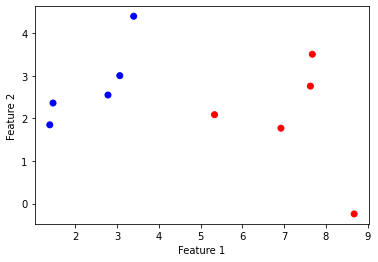

In [213]:
plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=data[:, -1], cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

**Create a perceptron object.**

In [210]:
## YOUR CODE HERE
features, true_labels = data[:, :-1], data[:, -1]
print("X:", features)
print("y:", true_labels)

X: [[ 2.7810836   2.550537  ]
 [ 1.46548937  2.36212508]
 [ 3.39656169  4.40029353]
 [ 1.38807019  1.85022032]
 [ 3.06407232  3.00530597]
 [ 7.62753121  2.75926224]
 [ 5.33244125  2.08862677]
 [ 6.92259672  1.77106367]
 [ 8.67541865 -0.24206865]
 [ 7.67375647  3.50856301]]
y: [-1. -1. -1. -1. -1.  1.  1.  1.  1.  1.]


**Train the perceptron on `data`. The last column contains the labels.**  
After 3 epochs, the classification accuracy of your perceptron should be 1.0.

Iteration 1, Misclassifications = 0


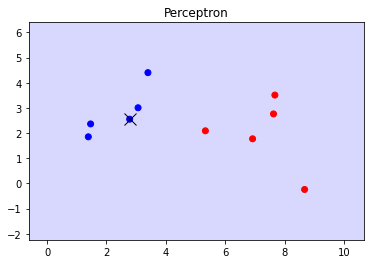

Iteration 2, Misclassifications = 1


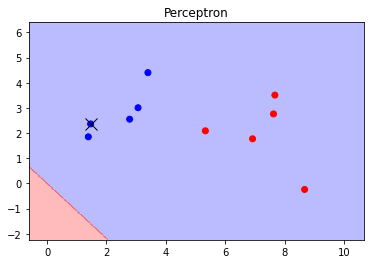

Iteration 3, Misclassifications = 1


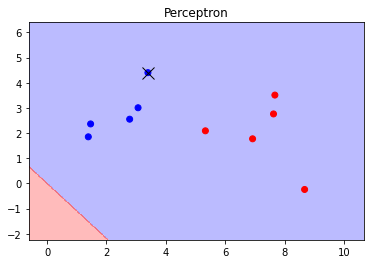

Iteration 4, Misclassifications = 1


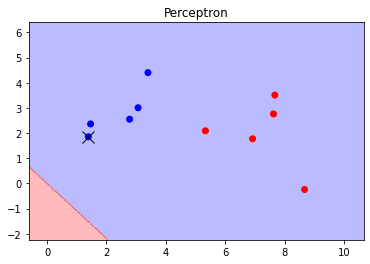

Iteration 5, Misclassifications = 1


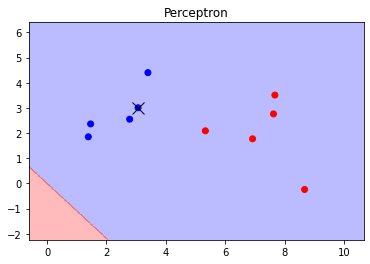

Iteration 6, Misclassifications = 1


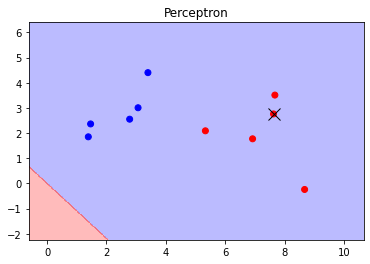

Iteration 7, Misclassifications = 2


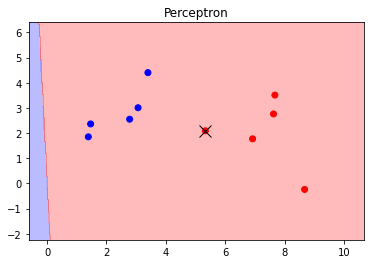

Iteration 8, Misclassifications = 2


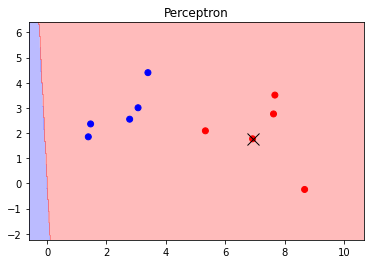

Iteration 9, Misclassifications = 2


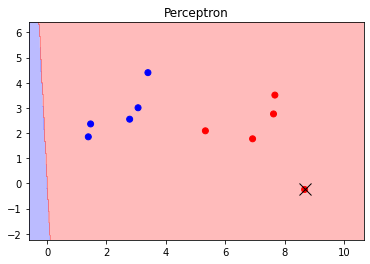

Iteration 10, Misclassifications = 2


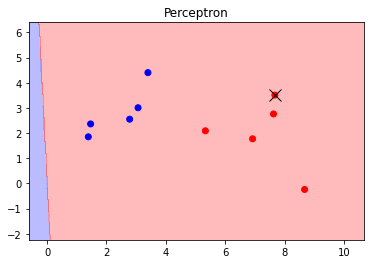

Epoch 1, Accuracy = 0.8
Iteration 11, Misclassifications = 0


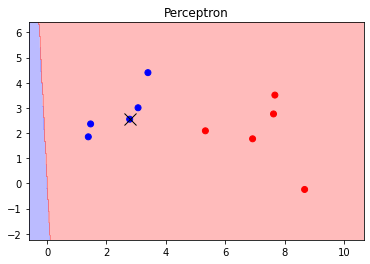

Iteration 12, Misclassifications = 1


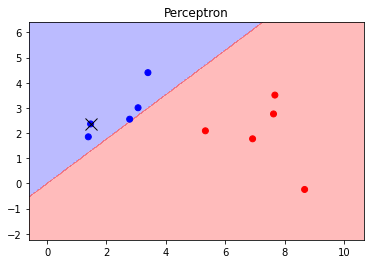

Iteration 13, Misclassifications = 1


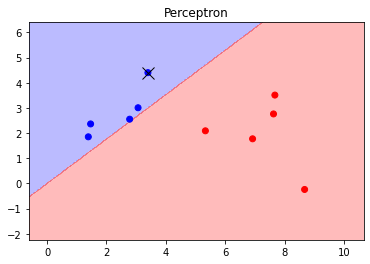

Iteration 14, Misclassifications = 1


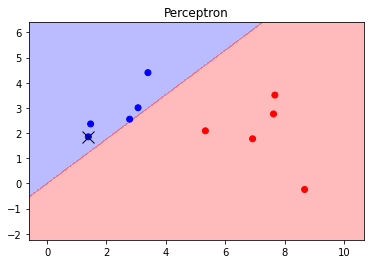

Iteration 15, Misclassifications = 1


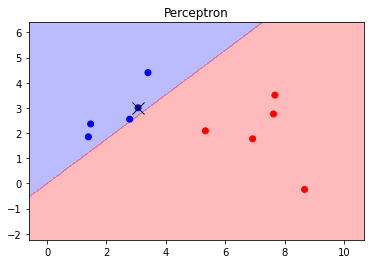

Iteration 16, Misclassifications = 1


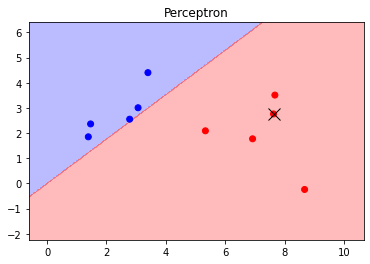

Iteration 17, Misclassifications = 1


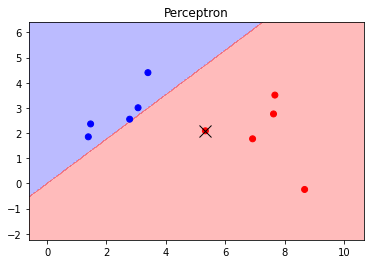

Iteration 18, Misclassifications = 1


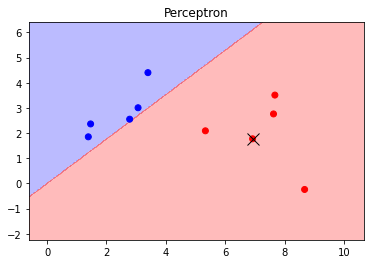

Iteration 19, Misclassifications = 1


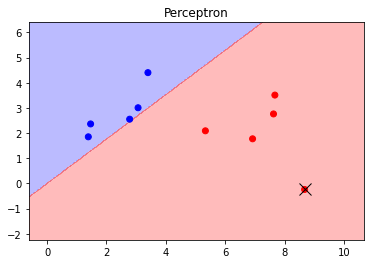

Iteration 20, Misclassifications = 1


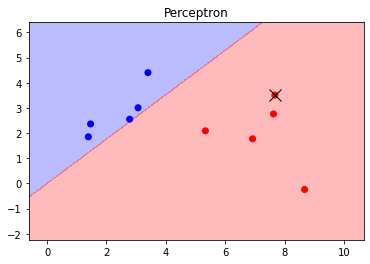

Epoch 2, Accuracy = 0.9
Iteration 21, Misclassifications = 0


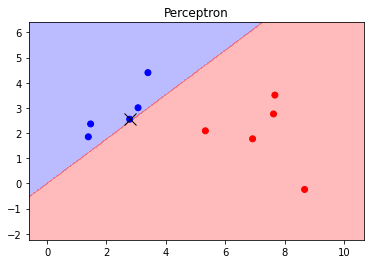

Iteration 22, Misclassifications = 0


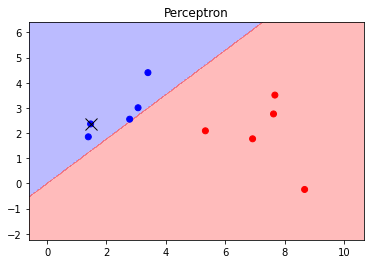

Iteration 23, Misclassifications = 0


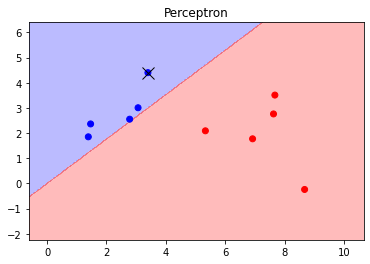

Iteration 24, Misclassifications = 0


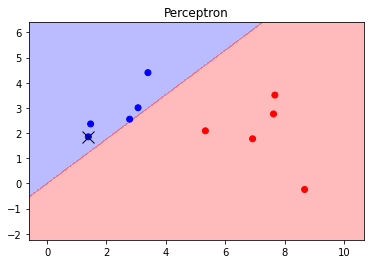

Iteration 25, Misclassifications = 0


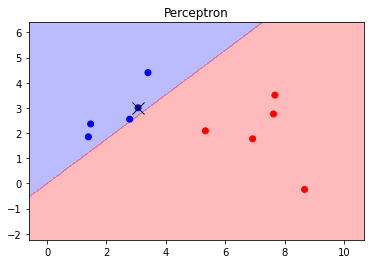

Iteration 26, Misclassifications = 0


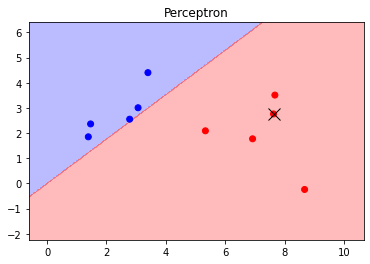

Iteration 27, Misclassifications = 0


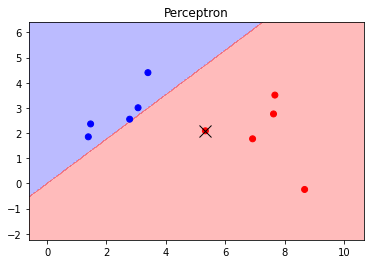

Iteration 28, Misclassifications = 0


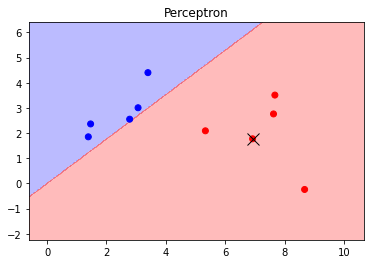

Iteration 29, Misclassifications = 0


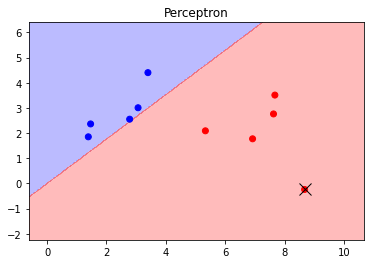

Iteration 30, Misclassifications = 0


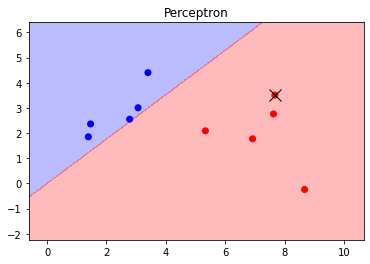

Epoch 3, Accuracy = 1.0


In [211]:
## YOUR CODE HERE
model = Perceptron(data)
model.train(features, true_labels)

**Yayy DONE!!**